### Exercise 3: Heat capacity fo solid
Debye's theory of solids gives the heat capacity of a solid at temperatyre T to be:
$C_{V} = 9V\rho k_{B}\left(\frac{T}{\theta_{D}} \right)^{3}\int^{\theta_{D}/T}_{0} \frac{x^{4}e^{x}}{(e^{x}-1)^{2}}dx$
donde $V$ es el volumen del sólido, $\rho$ es el número de densidad de átomos, $k_{B}$ is Boltzmann's constant, and $\theta_{D}$ is the so-called Debye temperature, a property of solids that depends on their density and speed of sound.

a) Write a Python function $C_{V}(T)$ that calculates $C_{V}$ for a given value of the temperature, for a sample consisting of 1000 $cm^{3}$ of solid aluminum, which as a number density of $\rho = 6.022\times 10^{28} m^{-3}$ and a Debye temperature of $\theta_{D} = 428 K.$
Use the trapezoidal rule to evaluatethe integral with N= 1000 sample points. Hint: The value of the integrand at x = 0 is zero.

In [7]:
from pylab import*

In [8]:
from numpy import*

In [9]:
V = 1e-3
rho = 6.022*1e+28
kB = 1.380649*1e-23
thetaD = 428

In [10]:
def Trapecio(a, b, f, n):
    x = linspace(a, b, n+1)
    suma = 0
    for i in range(1, n):
        suma = suma + f(x[i])
    Integral = (b-a)*(f(a) + 2*suma + f(b))/(2*n)
    return Integral

In [27]:
def Cv1(T):
    return 9*V*rho*kB*(T/thetaD)**(3)
def Cv2(x):
    return (x**4)*(np.exp(x))/((np.exp(x) - 1)**2)

In [58]:
TC1 = Cv1(50)* Trapecio(0.0001, 428/50, Cv2, 1000)
print("The heat capacity at T = 30K, Cv(T) =", TC1)

The heat capacity at T = 30K, Cv(T) = 289.3473364544642


b) Use yout function to make a graph of the heat capacity as a function of temperature from $T = 5K$ to $T = 500 K$.

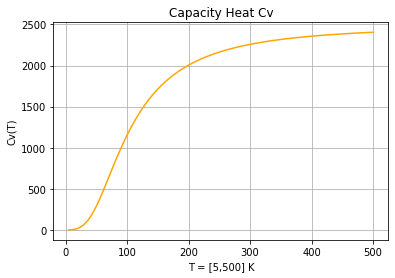

In [34]:
T = linspace(5, 500, 101)
def Cv3(T):
    n = T.shape[0]
    C = zeros(n)
    for i in range(n):
        C[i] = Cv1(T[i])*Trapecio(0.0001, 428/T[i], Cv2, 100)
    return C
plot(T, Cv3(T), color = 'orange')
plt.title("Capacity Heat Cv")
xlabel("T = [5,500] K")
ylabel("Cv(T)")
grid()
show()

### Exercise 4: Solving integrals with Simpson's rule.

a) Write a program to calculate an value for the integral $\int^{2}_{0}(x^{4} - 2x + 1)dx$ from Example 5.1, but using Simpson's rule with ten slices instead of the trapezoidal rule.

In [45]:
def Simpson13(a,b,f,n): # n debe ser múltiplo de 2.
    x = linspace(a,b,n+1)
    suma1 = 0
    suma2 = 0
    for i in range(1, n, 2):
        suma1 = suma1 + f(x[i])
    for j in range(2, n-1, 2):
        suma2 = suma2 + f(x[j])
    Integral = (b-a)*(f(a) + 4*suma1 + 2*suma2 + f(b))/(3*n)
    return Integral

In [46]:
def f4(x):
    return pow(x,4) - 2*x + 1

In [47]:
Int4a = Simpson13(0,2, f4, 10)
print(Int4a)

4.400426666666667


b) Run the program and compare your result to the known correct value of 4.4. What is the fractional error on your calculation?

In [51]:
print("The error in Simpson's rule es:",1 -(4.4)/Int4a)

The error in Simmpson's rule es: 9.696029475936285e-05


c) Modify the program to use a hundred slices instead, then a thousand. Note the improvement in the result. How do the results compare with those from Example 5.1 for the trapezoidal rule with the same number of slices?

In [56]:
Int4c1 = Simpson13(0, 2, f4, 100)
Int4c2 = Simpson13(0, 2, f4, 1000)
Int4c3 = Trapecio(0, 2, f4, 100)
Int4c4 = Trapecio(0, 2, f4, 1000)

print("Simpson With 100 slices:", Int4c1)
print("Trapecio With 100 slices:", Int4c3)
print("")

print("Simpson With 1000 slices:", Int4c2)
print("Trapecio With 1000 slices:", Int4c4)

Simpson With 100 slices: 4.400000042666667
Trapecio With 100 slices: 4.401066656

Simpson With 1000 slices: 4.400000000004267
Trapecio With 1000 slices: 4.4000106666656


### Exercise 5: Diffraction gratings.
Light with wavelength $\lambda$ is incident on a diffractiono grating of total width $\omega$, gets diffracted, is focused by a lens of focal length $f$, and falls on a screen.
Theory tells us that the intensity of the diffraction pattern on the screen, a distance $x$ from the central axis of the system, is given by:

$I(x) = \left|\int^{\omega/2}_{\omega/2}\sqrt{q(u)}e^{i2\pi xu/\lambda f}dx \right|^{2}$

where $q(u)$ is the intensity transmission function of the diffraction grating at a distance $u$ from de central axis.

a) Consider a grating with transmission function $q(u) = sin^{2}(\alpha x)$. What is the separation of the "slits" in the grating, expressed in terms of $\alpha$?